<a href="https://colab.research.google.com/github/jeddyclass/202302INTRO/blob/main/EDA_Chernoff_Faces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#sample from https://www.kaggle.com/code/delai50/visualize-numerical-features-with-chernoff-faces

import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os

PATH = "./"

In [ ]:
# Function to draw Chernoff faces (source: https://gist.github.com/dribnet/e26f52f423f0656c1bb8fc6f4e741cc2#file-mpl_cfaces-py)

def cface(ax, x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18):
    # x1 = height  of upper face
    # x2 = overlap of lower face
    # x3 = half of vertical size of face
    # x4 = width of upper face
    # x5 = width of lower face
    # x6 = length of nose
    # x7 = vertical position of mouth
    # x8 = curvature of mouth
    # x9 = width of mouth
    # x10 = vertical position of eyes
    # x11 = separation of eyes
    # x12 = slant of eyes
    # x13 = eccentricity of eyes
    # x14 = size of eyes
    # x15 = position of pupils
    # x16 = vertical position of eyebrows
    # x17 = slant of eyebrows
    # x18 = size of eyebrows
    
    # transform some values so that input between 0,1 yields variety of output
    x3 = 1.9*(x3-.5)
    x4 = (x4+.25)
    x5 = (x5+.2)
    x6 = .3*(x6+.01)
    x8 = 5*(x8+.001)
    x11 /= 5
    x12 = 2*(x12-.5)
    x13 += .05
    x14 += .1
    x15 = .5*(x15-.5)
    x16 = .25*x16
    x17 = .5*(x17-.5)
    x18 = .5*(x18+.1)

    # top of face, in box with l=-x4, r=x4, t=x1, b=x3
    e = matplotlib.patches.Ellipse( (0,(x1+x3)/2), 2*x4, (x1-x3), fc='white', edgecolor='black', linewidth=2)
    # e.set_clip_box(ax.bbox)
    # e.set_facecolor([0,0,0])
    ax.add_artist(e)

    # bottom of face, in box with l=-x5, r=x5, b=-x1, t=x2+x3
    e = matplotlib.patches.Ellipse( (0,(-x1+x2+x3)/2), 2*x5, (x1+x2+x3), fc='white', edgecolor='black', linewidth=2)
    ax.add_artist(e)

    # cover overlaps
    e = matplotlib.patches.Ellipse( (0,(x1+x3)/2), 2*x4, (x1-x3), fc='white', edgecolor='black', ec='none')
    ax.add_artist(e)
    e = matplotlib.patches.Ellipse( (0,(-x1+x2+x3)/2), 2*x5, (x1+x2+x3), fc='white', edgecolor='black', ec='none')
    ax.add_artist(e)
    
    # draw nose
    ax.plot([0,0], [-x6/2, x6/2], 'k')
    
    # draw mouth
    p = matplotlib.patches.Arc( (0,-x7+.5/x8), 1/x8, 1/x8, theta1=270-180/np.pi*np.arctan(x8*x9), theta2=270+180/np.pi*np.arctan(x8*x9))
    ax.add_artist(p)
    
    # draw eyes
    p = matplotlib.patches.Ellipse( (-x11-x14/2,x10), x14, x13*x14, angle=-180/np.pi*x12, facecolor='white', edgecolor='black')
    ax.add_artist(p)
    
    p = matplotlib.patches.Ellipse( (x11+x14/2,x10), x14, x13*x14, angle=180/np.pi*x12, facecolor='white', edgecolor='black')
    ax.add_artist(p)

    # draw pupils
    p = matplotlib.patches.Ellipse( (-x11-x14/2-x15*x14/2, x10), .05, .05, facecolor='black')
    ax.add_artist(p)
    p = matplotlib.patches.Ellipse( (x11+x14/2-x15*x14/2, x10), .05, .05, facecolor='black')
    ax.add_artist(p)
    
    # draw eyebrows
    ax.plot([-x11-x14/2-x14*x18/2,-x11-x14/2+x14*x18/2],[x10+x13*x14*(x16+x17),x10+x13*x14*(x16-x17)],'k')
    ax.plot([x11+x14/2+x14*x18/2,x11+x14/2-x14*x18/2],[x10+x13*x14*(x16+x17),x10+x13*x14*(x16-x17)],'k')

In [ ]:
!wget https://github.com/jeddyclass/202210.NCUT/blob/main/train.zip?raw=true

--2022-10-25 07:35:52--  https://github.com/jeddyclass/202210.NCUT/blob/main/train.zip?raw=true
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/jeddyclass/202210.NCUT/raw/main/train.zip [following]
--2022-10-25 07:35:52--  https://github.com/jeddyclass/202210.NCUT/raw/main/train.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jeddyclass/202210.NCUT/main/train.zip [following]
--2022-10-25 07:35:52--  https://raw.githubusercontent.com/jeddyclass/202210.NCUT/main/train.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Lengt

In [ ]:
!mv train.zip?raw=true train.zip

In [ ]:
!unzip train.zip

Archive:  train.zip
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train.csv               


In [ ]:
# Read the training data
df_train = pd.read_csv(os.path.join(PATH, "train.csv"))
num_feats = [c for c in df_train.columns if c.startswith("cont")]
df_train_num = df_train[num_feats].values

In [ ]:
num_feats

['cont0',
 'cont1',
 'cont2',
 'cont3',
 'cont4',
 'cont5',
 'cont6',
 'cont7',
 'cont8',
 'cont9',
 'cont10']

In [ ]:
df_train[num_feats].values

array([[0.62985809, 0.85534905, 0.7594387 , ..., 0.81525375, 0.96500633,
        0.66591512],
       [0.3707271 , 0.32892942, 0.38638484, ..., 0.39935257, 0.92740583,
        0.49372922],
       [0.5022717 , 0.32274884, 0.34325474, ..., 0.41230312, 0.29269552,
        0.54945239],
       ...,
       [0.46979655, 0.4242654 , 0.41840797, ..., 0.43757009, 0.28824522,
        0.29370387],
       [0.62589299, 0.3387324 , 0.36348379, ..., 0.44100841, 0.25483359,
        0.5308837 ],
       [0.31721078, 0.34485927, 0.27612515, ..., 0.44724847, 0.56267389,
        0.39307631]])

In [ ]:
cf = np.ones((df_train.shape[0], 17)) * 0.5
# Fill the columns with the desired facial features with our dataset
cf[:,[0,1,2,3,5,8,9,10,11,12,15]] = df_train_num

# Split the matrix according to the target value
cf_ones = cf[df_train["target"]==1, :]
cf_zeros = cf[df_train["target"]==0, :]

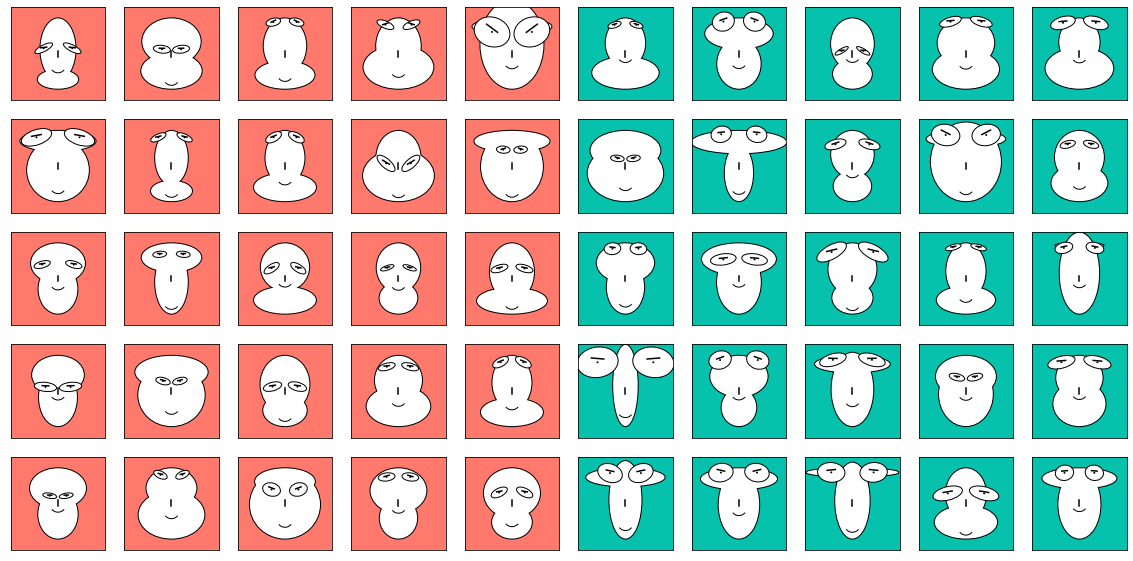

In [ ]:
fig, ax = plt.subplots(5,10, figsize=(20,10))

for i in range(5):
    for j in range(10):
        if j < 5:
            cface(ax[i,j], .9, *cf_zeros[np.random.randint(cf_zeros.shape[0]),:])
            ax[i,j].set_facecolor('xkcd:salmon')
        else:
            cface(ax[i,j], .9, *cf_ones[np.random.randint(cf_ones.shape[0]),:])
            ax[i,j].set_facecolor('xkcd:turquoise')
        ax[i,j].axis([-1.2, 1.2, -1.2, 1.2])
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])